In [169]:
import timeit
import pandas as pd
import numpy as np
import time
import seaborn as sns
import re

In [2]:
df = pd.read_csv("../../target/distinct-salinity.tsv", sep='\t', header=None)

In [3]:
df = df.applymap(lambda x: x.strip() if type(x)==str else x)

In [4]:
df

,0,1
0,3377,Missing: Not provided
1,2325,not provided
2,1651,0
3,1032,55 g/L
4,762,NaN
...,...,...
5033,1,38.032
5034,1,34.093
5035,1,36.863
5036,1,33.8 PSU


In [5]:
df.describe()

,0
count,5038.000000
mean,5.851925
std,67.853603
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3377.000000


In [6]:
df.iloc[:,1]

0       Missing: Not provided
1                not provided
2                           0
3                      55 g/L
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 PSU
5037                  40.7121
Name: 1, Length: 5038, dtype: object

In [7]:
col = df.iloc[:,1]
frame = { 'salinity': col } 
dfcol = pd.DataFrame(frame) 

In [8]:
#check if whitespace trimming worked
df.loc[dfcol['salinity'].astype(str).str.isspace()]

,0,1


In [9]:
def isnum(x):
    try:
        float(x)
        return True
    except:
        return False


In [10]:
dfcol_reals = dfcol.apply(pd.to_numeric, errors='coerce')

In [11]:
dfcol_reals

,salinity
0,NaN
1,NaN
2,0.0000
3,NaN
4,NaN
...,...
5033,38.0320
5034,34.0930
5035,36.8630
5036,NaN


In [12]:
dfcol_reals.describe()

,salinity
count,3232.000000
mean,163.782794
std,3351.342712
min,-999.000000
25%,28.627500
50%,34.435650
75%,35.763225
max,164045.000000


In [13]:
dfcol_reals_descr = dfcol_reals.describe()
reals = dfcol_reals_descr.loc['count',]
#type(dfcol_reals)

dfcol_str = dfcol



<AxesSubplot:>

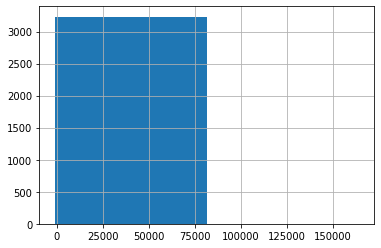

In [14]:
dfcol_reals['salinity'].hist(bins=2)

In [15]:
dfcol_reals[dfcol_reals['salinity'] < 0]

,salinity
40,-999.0


In [16]:
dfcol_reals[dfcol_reals['salinity'] > 100]

,salinity
18,999.000000
524,228.140000
576,228.000000
613,18741.000000
710,200.000000
...,...
4721,342.400000
4821,290.150000
4915,340.000000
4920,281.150000


In [17]:
dfcol_reals[(dfcol_reals['salinity'] < 100) & (dfcol_reals['salinity'] > 0)]

,salinity
7,35.0000
9,32.0000
10,34.0000
19,28.0000
22,0.1100
...,...
5031,32.4900
5033,38.0320
5034,34.0930
5035,36.8630


array([[<AxesSubplot:title={'center':'salinity'}>]], dtype=object)

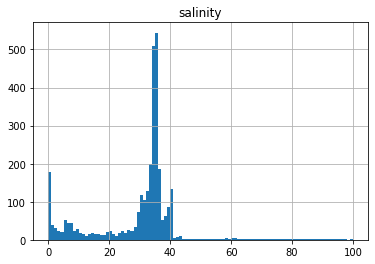

In [18]:
dfcol_reals[(dfcol_reals['salinity'] < 100) & (dfcol_reals['salinity'] > 0)].hist(bins=100)

In [19]:
dfcol

,salinity
0,Missing: Not provided
1,not provided
2,0
3,55 g/L
4,NaN
...,...
5033,38.032
5034,34.093
5035,36.863
5036,33.8 PSU


In [20]:
#dfcol_realmap = dfcol_reals.applymap(np.isreal)

dfcol.loc[dfcol['salinity'].astype(str).str.isalpha()]

,salinity
4,NaN
5,missing
20,NaN
25,NaN
28,Halophile
41,Unknown
88,FW
91,Halotolerant
409,nd
990,Stenohaline


In [21]:
dfcol.loc[~dfcol['salinity'].astype(str).str.isdigit() & (dfcol['salinity'].str.find(".")) ]

,salinity
0,Missing: Not provided
1,not provided
3,55 g/L
5,missing
6,not collected
...,...
5033,38.032
5034,34.093
5035,36.863
5036,33.8 PSU


In [22]:
dfcol.loc[dfcol['salinity'].astype(str).str.isalnum() | dfcol['salinity'].astype(str).str.isalpha()]

,salinity
2,0
4,NaN
5,missing
7,35
9,32
...,...
4674,54
4830,51
4857,73
4915,340


In [23]:
unitindex = dfcol['salinity'].str.contains("/")
unitindex[unitindex.isnull()] = "False"
type(unitindex)
unitindex.name = 'salinity'
unitindex

0       False
1       False
2       False
3        True
4       False
        ...  
5033    False
5034    False
5035    False
5036    False
5037    False
Name: salinity, Length: 5038, dtype: object

In [24]:
dfcol['salinity'].where(dfcol['salinity'].str.contains("/") | dfcol['salinity'].str.contains("%")).dropna()

3                  55 g/L
11                 400g/L
12                  70g/L
13                 110g/L
17                 100g/L
              ...        
4829              120 g/L
4855               0-35 %
4894    2.0 percent (w/v)
4897               27 g/L
4988              6.6 g/L
Name: salinity, Length: 172, dtype: object

In [228]:
values_w_units = dfcol['salinity'].where(dfcol['salinity'].str.contains("/") | dfcol['salinity'].str.contains("%") | dfcol['salinity'].str.contains("percent") | dfcol['salinity'].str.contains(" psu")).dropna()

In [229]:
len(values_w_units)

724

In [247]:
def pick_numeric_vs_wunit(instr):
    if instr is None:
        return None
    else:
        #print("start")
        #spa_ind = instr.find(" ")
        #print(spa_ind)
        #if(spa_ind != -1):
        #    try:
        #        return float(instr[0 : spa_ind])     
        #    except:
        #        print("FAILED not float")
        #else:
        #
        #^0$|^[1-9]\d*$|^\.\d+$|^0\.\d*$|^[1-9]\d*\.\d*$
        #digits = re.match("([0-9]*)",instr).groups()[0]
        #digits = re.match("(\d+\.?\d*)",instr)
        #(^[+-]?(([0-9]*)?[0-9](\.[0-9]*)?|\.[0-9]+))
        digits_matches = re.match("(^[+-]?(([0-9]+)?\.([0-9]+)))",instr)#?\d+*
        digits_w_string_matches = re.match("(^[+-]?(([0-9]+)?\.([0-9]+))*)", instr)#r'\D'
        
        #try:
        char_ind = re.search(r"\D", instr)#instr.index("/\D/")
        spa_ind = re.search(r" ", instr)
        char_span = ()
        spa_span = ()
        try:
            char_span = char_ind.span()
            print("char_ind %s ",char_ind)
            print("char_span %s ",char_span)            
            print("0 %s ",char_span[0])
        except:
            print("char_span failed")

        try:
            spa_span = spa_ind.span()
            print("spa_ind %s ",spa_ind)
            print("spa_span %s ",spa_span)         
            print("0 %s ",spa_span[0])
        except:
            print("spa_span failed")                      

        if len(spa_span) > 0:                
            number = instr[0:(spa_span[0])]
            string = instr[(spa_span[0]+1):]                
        elif len(char_span) > 0:
            number = instr[0:(char_span[0])]
            string = instr[(char_span[0]):]

        print("number, string %s %s ",number ,string)

        return (instr.lower(), number, string.lower())

        #except:
        #    print("NO ",instr)
        

success = 0
split_values_w_units = []

for string in values_w_units:
    print(string)
    result = pick_numeric_vs_wunit(string)
    if result is not None:
        print("Matched : %s %s ".format(result, string))
        success = success + 1
        split_values_w_units.append(result)
        
print("success %s",success)

55 g/L
char_ind %s  <re.Match object; span=(2, 3), match=' '>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(2, 3), match=' '>
spa_span %s  (2, 3)
0 %s  2
number, string %s %s  55 g/L
Matched : %s %s 
400g/L
char_ind %s  <re.Match object; span=(3, 4), match='g'>
char_span %s  (3, 4)
0 %s  3
spa_span failed
number, string %s %s  400 g/L
Matched : %s %s 
70g/L
char_ind %s  <re.Match object; span=(2, 3), match='g'>
char_span %s  (2, 3)
0 %s  2
spa_span failed
number, string %s %s  70 g/L
Matched : %s %s 
110g/L
char_ind %s  <re.Match object; span=(3, 4), match='g'>
char_span %s  (3, 4)
0 %s  3
spa_span failed
number, string %s %s  110 g/L
Matched : %s %s 
100g/L
char_ind %s  <re.Match object; span=(3, 4), match='g'>
char_span %s  (3, 4)
0 %s  3
spa_span failed
number, string %s %s  100 g/L
Matched : %s %s 
1%
char_ind %s  <re.Match object; span=(1, 2), match='%'>
char_span %s  (1, 2)
0 %s  1
spa_span failed
number, string %s %s  1 %
Matched : %s %s 
0.05 psu
char_ind %s 

char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(1, 2), match=' '>
spa_span %s  (1, 2)
0 %s  1
number, string %s %s  7 psu
Matched : %s %s 
37.34 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  37.34 psu
Matched : %s %s 
2.61 psu
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(4, 5), match=' '>
spa_span %s  (4, 5)
0 %s  4
number, string %s %s  2.61 psu
Matched : %s %s 
3.87%
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_span failed
number, string %s %s  3 .87%
Matched : %s %s 
35.42 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  35.42 psu
Matched : %s %s 
20.43 psu
char_ind 

spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  34.65 psu
Matched : %s %s 
3.39 psu
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(4, 5), match=' '>
spa_span %s  (4, 5)
0 %s  4
number, string %s %s  3.39 psu
Matched : %s %s 
34.01 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  34.01 psu
Matched : %s %s 
36.9 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(4, 5), match=' '>
spa_span %s  (4, 5)
0 %s  4
number, string %s %s  36.9 psu
Matched : %s %s 
13.13 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  

Matched : %s %s 
5.18 psu
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(4, 5), match=' '>
spa_span %s  (4, 5)
0 %s  4
number, string %s %s  5.18 psu
Matched : %s %s 
12.11 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  12.11 psu
Matched : %s %s 
35.11 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  35.11 psu
Matched : %s %s 
32.53 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  32.53 psu
Matched : %s %s 
27.19 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)

0 %s  5
number, string %s %s  42.03 psu
Matched : %s %s 
35.84 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  35.84 psu
Matched : %s %s 
4 psu
char_ind %s  <re.Match object; span=(1, 2), match=' '>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(1, 2), match=' '>
spa_span %s  (1, 2)
0 %s  1
number, string %s %s  4 psu
Matched : %s %s 
34.52 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  34.52 psu
Matched : %s %s 
20.58 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  20.58 psu
Matched : %s %s 
12.65 psu
char_ind %s  <re.Match object; span=(2, 3

0 %s  4
number, string %s %s  1.48 dS/m
Matched : %s %s 
34.896 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(6, 7), match=' '>
spa_span %s  (6, 7)
0 %s  6
number, string %s %s  34.896 psu
Matched : %s %s 
4-4.5 %
char_ind %s  <re.Match object; span=(1, 2), match='-'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  4-4.5 %
Matched : %s %s 
0.48 g/l
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(4, 5), match=' '>
spa_span %s  (4, 5)
0 %s  4
number, string %s %s  0.48 g/l
Matched : %s %s 
3.2 percent (w/v)
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(3, 4), match=' '>
spa_span %s  (3, 4)
0 %s  3
number, string %s %s  3.2 percent (w/v)
Matched : %s %s 
39%
char_ind %s  <re.Match obje

number, string %s %s  38.0812 psu
Matched : %s %s 
35.12 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  35.12 psu
Matched : %s %s 
34 psu
char_ind %s  <re.Match object; span=(2, 3), match=' '>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(2, 3), match=' '>
spa_span %s  (2, 3)
0 %s  2
number, string %s %s  34 psu
Matched : %s %s 
33.5782 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(7, 8), match=' '>
spa_span %s  (7, 8)
0 %s  7
number, string %s %s  33.5782 psu
Matched : %s %s 
32.752 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(6, 7), match=' '>
spa_span %s  (6, 7)
0 %s  6
number, string %s %s  32.752 psu
Matched : %s %s 
34.3986 psu
char_ind %s  <re.Match object; span=(

In [231]:
print(values_w_units.sort_values(ascending=True))

593                &gt;50%
169                    0 %
1195                 0 psu
2517    0 psu (freshwater)
4593              0 to 9 %
               ...        
3586            {1.03} {%}
2672            {16.6} {%}
2803            {19.1} {%}
2304            {19.4} {%}
4671            {4.76} {%}
Name: salinity, Length: 724, dtype: object


In [232]:
split_values_w_units

[('55 g/L', '55', 'g/L'),
 ('400g/L', '400', 'g/L'),
 ('70g/L', '70', 'g/L'),
 ('110g/L', '110', 'g/L'),
 ('100g/L', '100', 'g/L'),
 ('1%', '1', '%'),
 ('0.05 psu', '0.05', 'psu'),
 ('0.19 psu', '0.19', 'psu'),
 ('4%', '4', '%'),
 ('0.2 psu', '0.2', 'psu'),
 ('6 g/L', '6', 'g/L'),
 ('36.75 psu', '36.75', 'psu'),
 ('36.6 psu', '36.6', 'psu'),
 ('2 %', '2', '%'),
 ('0.04 psu', '0.04', 'psu'),
 ('36.58 psu', '36.58', 'psu'),
 ('0.09 psu', '0.09', 'psu'),
 ('36.74 psu', '36.74', 'psu'),
 ('0.07 psu', '0.07', 'psu'),
 ('0.11 psu', '0.11', 'psu'),
 ('0/NA', '0', '/NA'),
 ('0 %', '0', '%'),
 ('36.7 psu', '36.7', 'psu'),
 ('0.12 psu', '0.12', 'psu'),
 ('5.451 psu', '5.451', 'psu'),
 ('5.863 psu', '5.863', 'psu'),
 ('5.548 psu', '5.548', 'psu'),
 ('30 g/l', '30', 'g/l'),
 ('5.6 psu', '5.6', 'psu'),
 ('4 %', '4', '%'),
 ('35.1 psu', '35.1', 'psu'),
 ('33.94 psu', '33.94', 'psu'),
 ('0.21 psu', '0.21', 'psu'),
 ('400 g/L', '400', 'g/L'),
 ('0.06 psu', '0.06', 'psu'),
 ('30%', '30', '%'),
 ('35.0 

In [276]:

#def split_num_str(s):
#    return list(filter(None, re.split(r'(\d+\.?\d+)', s)))

#store = []
#for string in values_w_units:
#    print(string)
#    split = split_num_str(string)
#    print(split)
#    if(len(split) == 2):
#        store.append(split)


#value_unit_df = pd.DataFrame(store, columns = ['value', 'unit']) 
df_values_wunits = pd.DataFrame(split_values_w_units, columns =['full', 'value', 'unit']) 


In [255]:
df_values_wunits.describe()

,full,value,unit
count,724,724,724
unique,724,671,31
top,37.12 psu,0,psu
freq,1,6,551


In [257]:
df_values_wunits

,full,value,unit
0,55 g/l,55,g/l
1,400g/l,400,g/l
2,70g/l,70,g/l
3,110g/l,110,g/l
4,100g/l,100,g/l
...,...,...,...
719,35.1894 psu,35.1894,psu
720,6.6 g/l,6.6,g/l
721,0.3 psu,0.3,psu
722,31.5688 psu,31.5688,psu


In [260]:
unit_list = df_values_wunits['unit'].unique()

In [261]:
unit_list

array(['g/l', '%', 'psu', '/na', 'ds/m', '-32%', '-17%', 'g/dm3',
       '&gt;50%', '.87%', 'nacl', '{%}', 'percent (w/v)', '.4-27.6%',
       '-16.3%', 'mg/kg', '.90%', '(optimum at 3.5%)', 'psu (freshwater)',
       'mg/l', '-60g/l', '0 - 3% (w/v)', 'us/cm', '.80%', '240-300 g/l',
       '.64%', '100-400 g/l', 'of nacl (optimum, 3-4%)', 'to 9 %', '.4%',
       '.5%'], dtype=object)

In [34]:
type(unit_list)

numpy.ndarray

In [262]:
np.char.strip(unit_list)

TypeError: string operation on non-string array

In [263]:
# map(lambda x: x.strip(), unit_list)
    
unit_list = [x.strip() for x in unit_list]
unit_list_lower = [x.lower() for x in unit_list]
unit_list_lower = list(set(unit_list_lower))

print(unit_list_lower)

['240-300 g/l', '-32%', '/na', '.90%', '{%}', 'psu (freshwater)', 'percent (w/v)', 'ds/m', '-60g/l', 'mg/l', 'of nacl (optimum, 3-4%)', '.5%', '&gt;50%', 'psu', '(optimum at 3.5%)', '.4-27.6%', 'mg/kg', '.87%', '-17%', '.4%', 'nacl', '100-400 g/l', '.80%', 'g/dm3', '%', 'us/cm', '0 - 3% (w/v)', '.64%', 'g/l', 'to 9 %', '-16.3%']


In [37]:
###first mapping pass

mg/L * 1000 = g/L
g/l = g/L
g/L = g/L
g/dm3 = g/L
mg/kg = g/L
dS/m =
percent (w/v) =


SyntaxError: invalid syntax (<ipython-input-37-52091aa1e6a9>, line 8)

In [264]:

sum = 0

salinity_lower = dfcol['salinity'].str.lower()
for i in range(0,len(unit_list_lower)):

    #indices = np.where(dfcol['salinity'].isin([unit_list[i]]))
    #print(unit_list[i])
    #print(len(indices))
    #print(indices)
    
    #print(df[(df==unit_list[i])].dropna(how='all').index)
    
    print(unit_list_lower[i])
    results = salinity_lower[salinity_lower.str.contains(unit_list_lower[i], na=False)]
    lenr = len(results)
    sum = sum + lenr
    print(lenr)
    #print(results)
    
    

print("sum %s len(dfcol['salinity']) %s covered %s " % (sum, len(dfcol['salinity']), (sum/len(dfcol['salinity']))))
    

240-300 g/l
1
-32%
2
/na
1
.90%
1
{%}
8
psu (freshwater)
0
percent (w/v)
0
ds/m
10
-60g/l
1
mg/l
2
of nacl (optimum, 3-4%)
0
.5%
8
&gt;50%
1
psu
993
(optimum at 3.5%)
3
.4-27.6%
1
mg/kg
2
.87%
1
-17%
1
.4%
4
nacl
8
100-400 g/l
1
.80%
1
g/dm3
14
%
77
us/cm
1
0 - 3% (w/v)
0
.64%
1
g/l
49
to 9 %
1
-16.3%
1
sum 1194 len(dfcol['salinity']) 5038 covered 0.2369988090512108 


/Users/marcin/Documents/VIMSS/ontology/Sample/biosample-analysis/venv/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [57]:
salinity_lower

0       missing: not provided
1                not provided
2                           0
3                      55 g/l
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 psu
5037                  40.7121
Name: salinity, Length: 5038, dtype: object

In [52]:
col = df.iloc[:,1]
frame = { 'salinity': col } 
dfcol = pd.DataFrame(frame) 
dfcol_reals = dfcol.apply(pd.to_numeric, errors='coerce')
#dfcol_reals.describe(include='all')
real_na = dfcol_reals.isna().sum()
real_len = len(dfcol_reals)
print("na %s ", real_na)
print("real %s ", real_len - real_na)
print("total %s ",)

na %s  salinity    1806
dtype: int64
real %s  salinity    3232
dtype: int64
total %s  5038


In [152]:
dfcol['salinity']

0       Missing: Not provided
1                not provided
2                           0
3                      55 g/L
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 PSU
5037                  40.7121
Name: salinity, Length: 5038, dtype: object

In [200]:
dfcol_lower = dfcol["salinity"].str.lower()#map(lambda x: x.lower() if(x == str)  else x)
dfcol_lower

0       missing: not provided
1                not provided
2                           0
3                      55 g/l
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 psu
5037                  40.7121
Name: salinity, Length: 5038, dtype: object

In [204]:
#salinity
#4	NaN
#5	missing
#20	NaN
#25	NaN
#28	Halophile
#41	Unknown
#88	FW
#91	Halotolerant
#409	nd
#990	Stenohaline
#2147	unknown
#3061	xx
#3647	Original

#Halophile, FW, Halotolerant, Stenohaline
missing_strings = ["missing: not provided", "not provided", "none", "missing","unknown","nd","xx","NaN"]
print("NA %s", dfcol_lower.isna().sum())
i = 0
len_now = len(missing_strings)
for i in range(0,len_now):
    print(clean_strings[i])
    dfNone = dfcol_lower.str.match(missing_strings[i])
    #dfNone[dfNone == np.NaN] = False
    print(len(dfNone))
    print(dfNone.value_counts())
    #dfcol_lower[dfNone] = np.NaN

NA %s 3
missing: not provided
5038
False    5033
True        2
Name: salinity, dtype: int64
not provided
5038
False    5034
True        1
Name: salinity, dtype: int64
none
5038
False    5035
Name: salinity, dtype: int64
missing
5038
False    5030
True        5
Name: salinity, dtype: int64
unknown
5038
False    5033
True        2
Name: salinity, dtype: int64
nd
5038
False    5034
True        1
Name: salinity, dtype: int64
xx
5038
False    5034
True        1
Name: salinity, dtype: int64
NaN
5038
False    5035
Name: salinity, dtype: int64


In [ ]:
dfcol_lower

In [233]:

#['g/l', '%', 'psu', '/na', 'ds/m', '-32%', '-17%', 'g/dm3',
#       '&gt;50%', '.87%', 'nacl', '{%}', 'percent (w/v)', '.4-27.6%',
#       '-16.3%', 'mg/kg', '.90%', '(optimum at 3.5%)', 'psu (freshwater)',
#       'mg/l', '-60g/l', '0 - 3% (w/v)', 'us/cm', '.80%', '240-300 g/l',
#       '.64%', '100-400 g/l', 'of nacl (optimum, 3-4%)', 'to 9 %', '.4%',
#       '.5%']

#mg/l * 1000 = g/l
#g/dm3 = g/l
#mg/kg = g/l
#dS/m = g/l
#percent (w/v) = Liquid? Solid (dry weight)? = g / 100 mL = 10 * g/L
#psu = mg/kg * 1000 = g/l
#us/cm = us/cm * 100 = dS/m = g/l


def mg_per_l__to__g_per_l(x):
    return x * 1000

def g_per_dm3__to__g_per_l(x):
    return x

def mg_per_kg__to__g_per_l(x):
    return x * 1000

def ds_per_m__to__g_per_l(x):
    return x * 550
#https://landscape.sa.gov.au/mr/publications/measuring-salinity

def us_per_m__to__g_per_l(x):
    return x * 100 * 550
#https://extension.umd.edu/learn/how-interpret-salinity-test-results

def percent__to__g_per_l(x):
    return x * 10
def percent_nacl__to__g_per_l(x):
    return x * 10
def percent_w_by_v__to__g_per_l(x):
    return x * 10
#https://www.labce.com/spg913555_calculating_percent_weightvolume__wv.aspx

def psu__to__g_per_l(x):
    return x
#http://www.salinityremotesensing.ifremer.fr/sea-surface-salinity/definition-and-units

#unit_list_lower
unit_list_lower =['%',
 'mg/kg',
 '%+ nacl',
 'percent (w/v)',
 'g/l',
 'ds/m',
 '-4 %',
 'mg/l',
 'g/dm3']

unit_percent = ['%',
 '%+ nacl',
 'percent (w/v)']

type(unit_list_lower)

list

In [217]:
for unit in unit_list_lower:
    #dfcol_lower_new = lambda x: dfcol_lower[dfcol_lower.str.find(unit)]
    if(unit in unit_percent):
        dfcol_lower.str.find(unit).map(lambda x: percent__to__g_per_l(x),
            na_action='ignore')
    elif(unit in ['mg/kg', 'mg/l']):
        dfcol_lower.str.find(unit).map(lambda x: mg_per_kg__to__g_per_l(x),
            na_action='ignore')
    elif(unit in ['ds/m']):
        dfcol_lower.str.find(unit).map(lambda x: ds_per_m__to__g_per_l(x),
            na_action='ignore')
    elif(unit in ['us/cm']):
        dfcol_lower.str.find(unit).map(lambda x: us_per_m__to__g_per_l(x),
    elif(unit in ['g/dm3']):
        dfcol_lower.str.find(unit).map(lambda x: g_per_dm3__to__g_per_l(x),
            na_action='ignore')
    elif(unit in ['psu']):
        dfcol_lower.str.find(unit).map(lambda x: psu__to__g_per_l(x),
            na_action='ignore')

In [283]:

print(df_values_wunits.shape)
df_values_wunits_new = pd.DataFrame(split_values_w_units, columns =['full', 'value_new', 'unit']) 


for i in range(1,df_values_wunits.shape[0]):
    print("i ",i)
    print(df_values_wunits.unit[i])
    index = unit_list_lower.index(df_values_wunits.unit[i])
    print(index)
    unit = unit_list_lower[index]
    if(unit in unit_percent):
        df_values_wunits_new.value_new[i] = percent__to__g_per_l(df_values_wunits.value[i])
    elif(unit in ['mg/kg', 'mg/l']):
        df_values_wunits_new.value_new[i] = mg_per_kg__to__g_per_l(df_values_wunits.value[i])
    elif(unit in ['ds/m']):
        df_values_wunits_new.value_new[i] = ds_per_m__to__g_per_l(df_values_wunits.value[i])
    elif(unit in ['us/cm']):
        df_values_wunits_new.value_new[i] = us_per_m__to__g_per_l(df_values_wunits.value[i])
    elif(unit in ['g/dm3']):
        df_values_wunits_new.value_new[i] = g_per_dm3__to__g_per_l(df_values_wunits.value[i])
    elif(unit in ['psu']):
        df_values_wunits_new.value_new[i] = psu__to__g_per_l(df_values_wunits.value[i])

(724, 3)
i  1
g/l
28
i  2
g/l
28
i  3
g/l
28
i  4
g/l
28
i  5
%
24
i  6
psu
13
i  7
psu
13
i  8
%
24
i  9
psu
13
i  10
g/l
28
i  11
psu
13
i  12
psu
13
i  13
%
24
i  14
psu
13
i  15
psu
13
i  16
psu
13
i  17
psu
13
i  18
psu
13
i  19
psu
13
i  20
/na
2
i  21
%
24
i  22
psu
13
i  23
psu
13
i  24
psu
13
i  25
psu
13
i  26
psu
13
i  27
g/l
28
i  28
psu
13
i  29
%
24
i  30
psu
13
i  31
psu
13
i  32
psu
13
i  33
g/l
28
i  34
psu
13
i  35
%
24
i  36
psu
13
i  37
psu
13
i  38
ds/m
7
i  39
ds/m
7
i  40
psu
13
i  41
ds/m
7
i  42
-32%
1
i  43
psu
13
i  44
psu
13
i  45
-17%
18
i  46
-32%
1
i  47
psu
13
i  48
psu
13
i  49
ds/m
7
i  50
psu
13
i  51
g/dm3
23
i  52
psu
13
i  53
%
24
i  54
g/dm3
23
i  55
psu
13
i  56
g/dm3
23
i  57
psu
13
i  58
g/dm3
23
i  59
g/dm3
23
i  60
g/dm3
23
i  61
g/dm3
23
i  62
g/dm3
23
i  63
g/dm3
23
i  64
g/dm3
23
i  65
psu
13
i  66
psu
13
i  67
psu
13
i  68
psu
13
i  69
g/l
28
i  70
&gt;50%
12
i  71
%
24
i  72
psu
13
i  73
psu
13
i  74
g/dm3
23
i  75
psu
13
i  76
psu
13
i 

NameError: name 'us_per_m__to__g_per_l' is not defined

In [284]:
df_values_wunits_old_vs_new = pd.DataFrame(df_values_wunits_new) 

df_values_wunits_old_vs_new = pd.concat([df_values_wunits_new, df_values_wunits], axis=1, join='inner')

#df_values_wunits_old_vs_new.append(df_values_wunits.value)
df_values_wunits_old_vs_new.head()
#sns.scatterplot(data=df_values_wunits_old_vs_new, x="value_old", y="value")

,full,value_new,unit,full,value,unit
0,55 g/l,55,g/l,55 g/l,55,g/l
1,400g/l,400,g/l,400g/l,400,g/l
2,70g/l,70,g/l,70g/l,70,g/l
3,110g/l,110,g/l,110g/l,110,g/l
4,100g/l,100,g/l,100g/l,100,g/l


<AxesSubplot:xlabel='value_new', ylabel='value'>

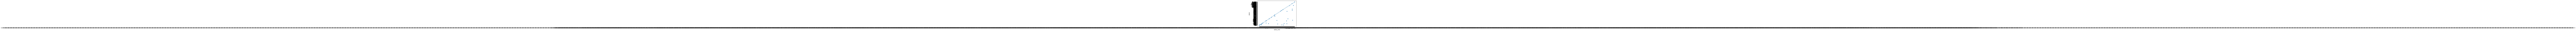

In [286]:
sns.scatterplot(data=df_values_wunits_old_vs_new, x="value_new", y="value")